In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 16 00:34:36 2023

@author: dagom
"""
#### analisis de texto
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn import model_selection, svm
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


vectorizer = CountVectorizer()
vectorizer

corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
X = vectorizer.fit_transform(corpus) ## transformar en matriz
X

y=[1, 0, 1, 1 ] ## target variable
#coun_vect = CountVectorizer()



In [ ]:
count_array = X.toarray()  ## para ver la matriz en formato no sparse
df = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
print(df)
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df, y, test_size=0.5, random_state=1)
## df es el equivalente al terms document matrix


   and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    1      0     1
1    0         1      0   1    0       2    1      0     1
2    1         0      0   0    1       0    1      1     0
3    0         1      1   1    0       0    1      0     1


In [ ]:
print(Train_X)
print(Train_Y)

   and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    1      0     1
1    0         1      0   1    0       2    1      0     1
[1, 0]


In [ ]:

analyze = vectorizer.build_analyzer() ## tokenizador tranforma el texto en una lista de palabras
analyze("This is a text document to analyze.") == (
    ['this', 'is', 'text', 'document', 'to', 'analyze'])

#########################


Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus)
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

print(Tfidf_vect.vocabulary_)
print(Train_X_Tfidf)

{'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 8)	1.0


In [ ]:
print(set(y))  # Print the unique values in your original target variable
print(set(Train_Y))  # Print the unique values in your training target variable

{0, 1}
{1}


In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear')
SVM.fit(Train_X,np.ravel(Train_Y))
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  100.0


In [ ]:

# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-con-R/master/datos/'
tweets_elon   = pd.read_csv(url + "datos_tweets_@elonmusk.csv")
tweets_edlee  = pd.read_csv(url + "datos_tweets_@mayoredlee.csv")
tweets_bgates = pd.read_csv(url + "datos_tweets_@BillGates.csv")

print('Número de tweets @BillGates: ' + str(tweets_bgates.shape[0]))
print('Número de tweets @mayoredlee: ' + str(tweets_edlee.shape[0]))
print('Número de tweets @elonmusk: ' + str(tweets_elon.shape[0]))

Número de tweets @BillGates: 2087
Número de tweets @mayoredlee: 2447
Número de tweets @elonmusk: 2678


In [ ]:

# Se unen los dos dataframes en uno solo
tweets = pd.concat([tweets_elon, tweets_edlee, tweets_bgates], ignore_index=True)

# Se seleccionan y renombran las columnas de interés
tweets = tweets[['screen_name', 'created_at', 'status_id', 'text']]
tweets.columns = ['autor', 'fecha', 'id', 'texto']

# Parseo de fechas
tweets['fecha'] = pd.to_datetime(tweets['fecha'])
tweets.head(3)

autor                     fecha            id  \
0  elonmusk 2017-11-09 17:28:57+00:00  9.286758e+17   
1  elonmusk 2017-11-09 17:12:46+00:00  9.286717e+17   
2  elonmusk 2017-11-08 18:55:13+00:00  9.283351e+17   

                                               texto  
0  "If one day, my words are against science, cho...  
1  I placed the flowers\n\nThree broken ribs\nA p...  
2          Atatürk Anıtkabir https://t.co/al3wt0njr6

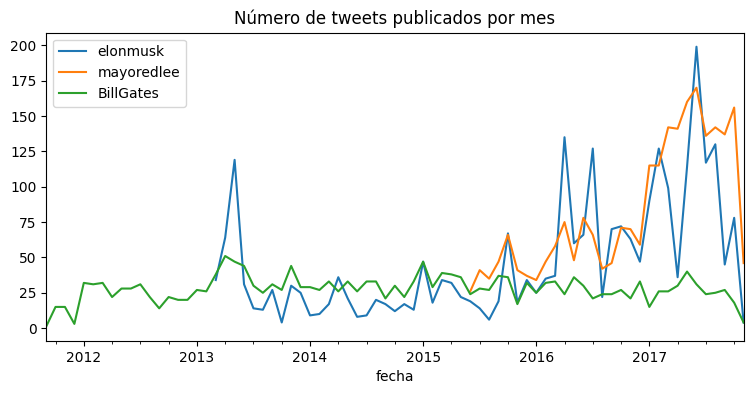

In [ ]:

# Distribución temporal de los tweets
# ==============================================================================
fig, ax = plt.subplots(figsize=(9,4))

for autor in tweets.autor.unique():
    df_temp = tweets[tweets['autor'] == autor].copy()
    df_temp['fecha'] = pd.to_datetime(df_temp['fecha'].dt.strftime('%Y-%m'))
    df_temp = df_temp.groupby(df_temp['fecha']).size()
    df_temp.plot(label=autor, ax=ax)

ax.set_title('Número de tweets publicados por mes')
ax.legend();

In [ ]:
## Paso 1 tokenizar el texto y crear el
corpus = tweets[['texto']].values.tolist()
i=1
n=len(corpus)
for i in range(n) :
 corpus[i]=str(corpus[i])

vectorizer = CountVectorizer()
vectorizer

X = vectorizer.fit_transform(corpus) ## transformar en matriz

count_array = X.toarray()
df = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
print(df)

      00  000  000x  003oloqo9x  00jsjszp0c  01  011ax8hctb  014  01ghg6c2y1  \
0      0    0     0           0           0   0           0    0           0   
1      0    0     0           0           0   0           0    0           0   
2      0    0     0           0           0   0           0    0           0   
3      0    0     0           0           0   0           0    0           0   
4      0    0     0           0           0   0           0    0           0   
...   ..  ...   ...         ...         ...  ..         ...  ...         ...   
7207   0    0     0           0           0   0           0    0           0   
7208   0    0     0           0           0   0           0    0           0   
7209   0    0     0           0           0   0           0    0           0   
7210   0    1     0           0           0   0           0    0           0   
7211   0    0     0           0           0   0           0    0           0   

      02fmtwq4ya  ...  zz3jgkgd5g  zzkf

In [ ]:

y= tweets[['autor']].values.tolist()

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df,y,test_size=0.3)


#Tfidf_vect = TfidfVectorizer(max_features=5000)
#Tfidf_vect.fit(corpus)
#Train_X_Tfidf = Tfidf_vect.transform(Train_X)
#Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#print(Tfidf_vect.vocabulary_)
#print(Train_X_Tfidf)

SVM = svm.SVC(C=1.0, kernel='linear')
SVM.fit(Train_X,np.ravel(Train_Y))
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  93.48428835489834


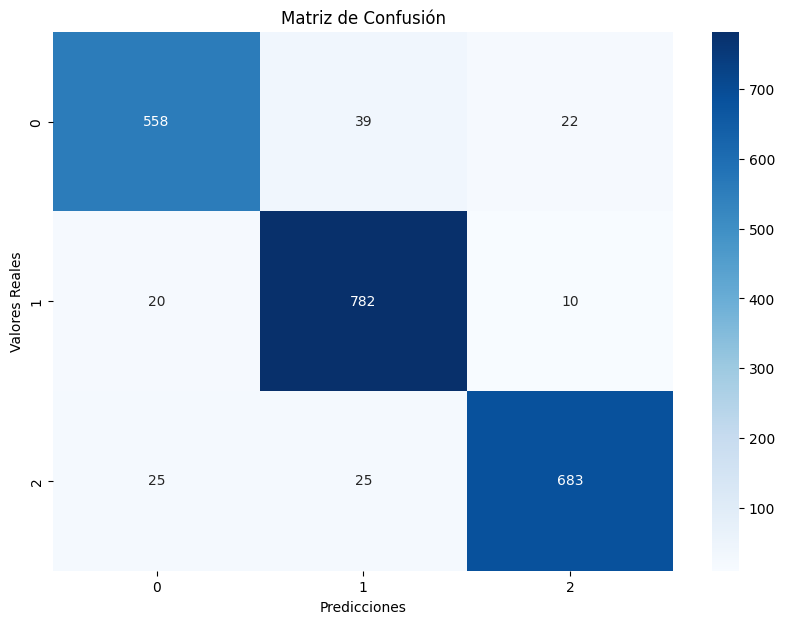

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de confusión
cm = confusion_matrix(Test_Y, predictions_SVM)

# Crea un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()


In [42]:
data=pd.read_csv('trump_tweets.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 27, saw 367
